# Lung Cancer 
## Saif Siddiqui
### 100824868

Lung cancer is a type of cancer that begins in the lungs.  Our chest has two spongy organs called lungs, which are used to breathe in oxygen and emit carbon dioxide. The largest cause of cancer-related deaths worldwide is lung cancer. The success of cancer prediction systems enables people to determine their cancer risk at a cheap cost and aids them in making the right decisions based on that knowledge. The information from this dataset is gathered from the online lung cancer prediction system website. With this dataset, we can identify what the main causes of lung cancer are. It will help patients discover if they are at risk of acquiring lung cancer. Through kaggle.com, this data collection was acquired. Data scientists and machine learning enthusiasts can connect online at Kaggle. With Kaggle, users may find and share datasets, work together with other users, and use GPU-integrated laptops. I chose this dataset because I was interested in the symptoms of lung cancer and how many people actually get it based on those symptoms. A question I will research is how certain symptoms contribute to lung cancer and if smoking is the main cause of lung cancer and its symptoms.

<img src = "lung-cancer.jpg" style = "width:280px; height:224px">

# Analysis
## Data Loading


In [305]:
import matplotlib.pyplot as plt  
import pandas as pd 
import seaborn as sns 
import numpy as np 

sns.set_style("darkgrid")

In [306]:
data = pd.read_csv("surveylungcancer.csv")
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


## Data Cleaning
1. Both cancer symptoms and non-symptoms are listed in the columns. I will only utilise the symptoms as a feature in this problem to predict the clinical prognosis of lung cancer. I will keep smoking as it is a major contributor to lung cancer.
2. Converting all categorical data to numeric
3. For LUNG_CANCER, yes becomes 0 and no becomes 1
4. For GENDER, male becomes 0 and female becomes 1
5. Changing column data name to data.columns
6. Remove duplicates

In [307]:
data = data.drop(['ALCOHOL CONSUMING', 'CHRONIC DISEASE', 'PEER_PRESSURE', 'ALLERGY '], axis = 1)
data.columns = [ 'GENDER','AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'FATIGUE ', 'WHEEZING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']
X = data[data.columns]
y = data.LUNG_CANCER
X.head()
 

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,FATIGUE,WHEEZING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,2,2,2,2,2,2,YES
1,M,74,2,1,1,2,1,1,2,2,2,YES
2,F,59,1,1,1,2,2,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,2,2,NO
4,F,63,1,2,1,1,2,2,2,1,1,NO


In [308]:
data.replace({"LUNG_CANCER":{'YES':2,'NO':1}},inplace=True)
data.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,FATIGUE,WHEEZING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,2,2,2,2,2,2,2
1,M,74,2,1,1,2,1,1,2,2,2,2
2,F,59,1,1,1,2,2,2,2,1,2,1
3,M,63,2,2,2,1,1,1,1,2,2,1
4,F,63,1,2,1,1,2,2,2,1,1,1


In [309]:
data.replace({"GENDER":{'M':0,'F':1}}, inplace = True)
data.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,FATIGUE,WHEEZING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,2,2,2,2,2,2,2
1,0,74,2,1,1,2,1,1,2,2,2,2
2,1,59,1,1,1,2,2,2,2,1,2,1
3,0,63,2,2,2,1,1,1,1,2,2,1
4,1,63,1,2,1,1,2,2,2,1,1,1


In [310]:
dup = data[data.duplicated()].shape[0]
print(f"There are {dup} duplicate entries among {data.shape[0]} entries in this dataset.")

data.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are now {data.shape[0]} entries.")

There are 40 duplicate entries among 309 entries in this dataset.

After removing duplicate entries there are now 269 entries.


In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 0 to 283
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 269 non-null    int64
 1   AGE                    269 non-null    int64
 2   SMOKING                269 non-null    int64
 3   YELLOW_FINGERS         269 non-null    int64
 4   ANXIETY                269 non-null    int64
 5   FATIGUE                269 non-null    int64
 6   WHEEZING               269 non-null    int64
 7   COUGHING               269 non-null    int64
 8   SHORTNESS OF BREATH    269 non-null    int64
 9   SWALLOWING DIFFICULTY  269 non-null    int64
 10  CHEST PAIN             269 non-null    int64
 11  LUNG_CANCER            269 non-null    int64
dtypes: int64(12)
memory usage: 27.3 KB


# Generated Plots
## Distributions
Male = 0 and female = 1, I've just cleaned up the data frame below. In this manner, totals can be added for analysis. Note that for all other categories, yes = 2 and no = 1. When adding totals, we must keep this in mind.
<br>In the distribution section, we will check the distributions between age, gender, and lung cancer

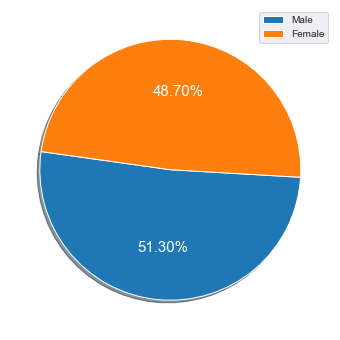

GENDER
0    138
1    131
dtype: int64


In [274]:
gender = data.value_counts("GENDER")
plt.figure(figsize=(6,6))
plt.pie(gender, labels=['Male','Female'], autopct="%.2f%%", textprops={"fontsize":15, "color":"w"}, explode=[0, 0.0], shadow = True, startangle = 172)
plt.legend()
plt.show()
print(data.value_counts("GENDER"))

The data distrubition is even. With 51% being male and 49% being female

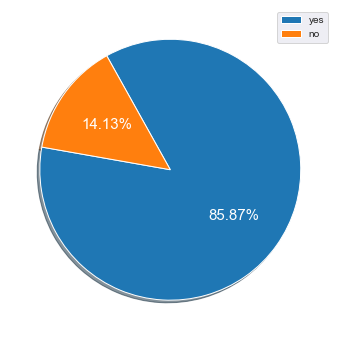

LUNG_CANCER
2    231
1     38
dtype: int64


In [275]:
lc = data.value_counts("LUNG_CANCER")
plt.figure(figsize=(6,6))
plt.pie(lc, labels=['yes','no'], autopct="%.2f%%", textprops={"fontsize":15, "color":"w"}, explode=[0, 0.0], shadow=True, startangle = 170)
plt.legend()
plt.show()
print(data.value_counts("LUNG_CANCER"))

As we can see, 86% of those on record have a case on Lung Cancer

Figure below shows the distribution of patient ages. As we can see, the larger part of passengers were aged 45-80, with majority being aged 55-70.

<AxesSubplot:xlabel='AGE', ylabel='Count'>

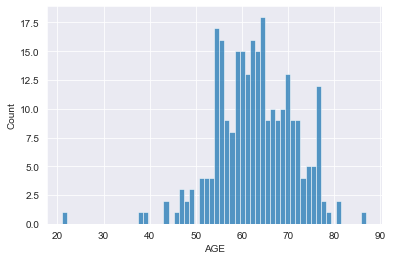

In [276]:
sns.histplot(data['AGE'],bins=60)

<AxesSubplot:xlabel='AGE', ylabel='Count'>

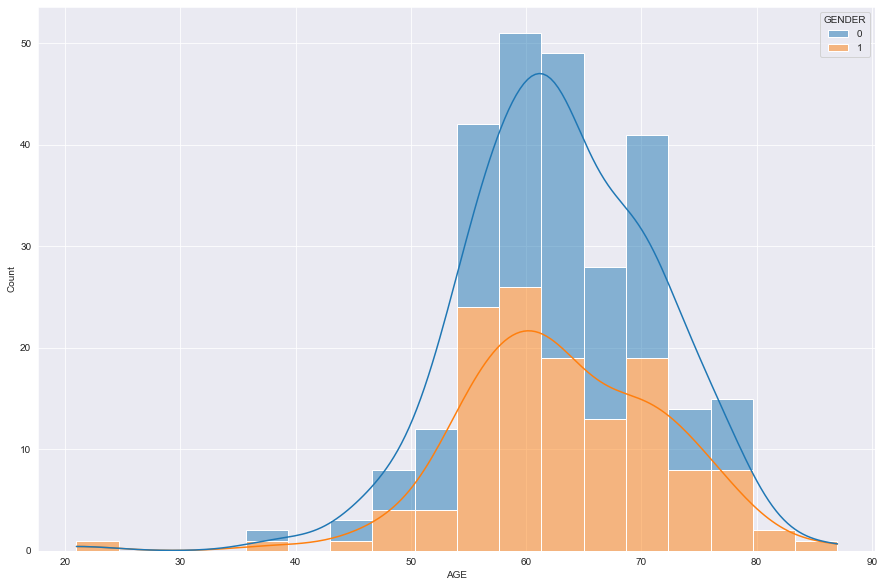

In [277]:
plt.figure(figsize=(15,10))
sns.histplot(data=data,x='AGE',hue="GENDER",kde=True,multiple='stack')

<AxesSubplot:title={'center':'AGE'}, xlabel='[LUNG_CANCER]'>

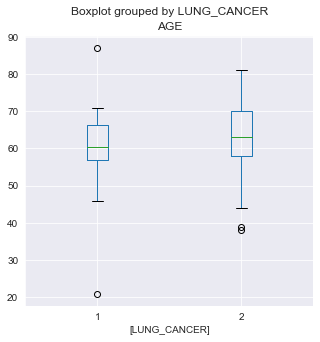

In [278]:
box = data[['LUNG_CANCER','AGE']]
box.boxplot(by = 'LUNG_CANCER',figsize = (5,5))

Scatterplot graphs to show data

<AxesSubplot:xlabel='AGE', ylabel='LUNG_CANCER'>

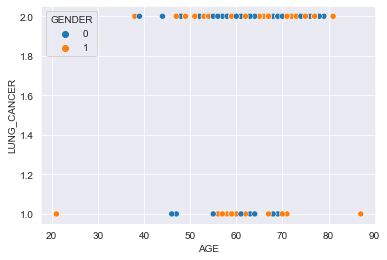

In [324]:
sns.scatterplot(data=data, x="AGE", y="LUNG_CANCER",hue='GENDER')

<AxesSubplot:xlabel='AGE', ylabel='GENDER'>

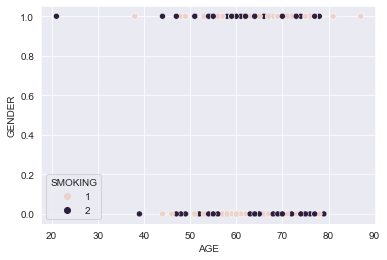

In [325]:
sns.scatterplot(data=data, x="AGE", y="GENDER",hue='SMOKING')

<AxesSubplot:xlabel='SMOKING', ylabel='AGE'>

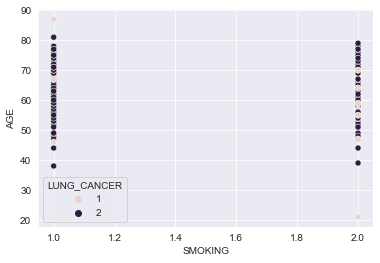

In [328]:
sns.scatterplot(data=data, x="SMOKING", y="AGE",hue='LUNG_CANCER')

In [282]:
data.groupby(["LUNG_CANCER"])["AGE"].value_counts()

LUNG_CANCER  AGE
1            59      4
             63      4
             55      3
             57      3
             60      3
             68      3
             69      3
             56      2
             61      2
             64      2
             21      1
             46      1
             47      1
             58      1
             62      1
             67      1
             70      1
             71      1
             87      1
2            64     16
             62     15
             56     14
             60     12
             70     12
             59     11
             61     11
             63     11
             67      9
             72      9
             77      9
             71      8
             54      7
             55      7
             58      7
             69      7
             57      6
             68      6
             65      5
             74      5
             75      5
             51      4
             52      4
             53  

A high quantity of those on record were aged 60-70. We can come to the conclusion that most people have a higher chance of getting Lung Cancer when they reach the age of 50.

In [283]:
from statistics import mean, median, mode, stdev
ds = data.AGE.describe()
print(f"Mean age: {round(ds['mean'],2)}")
print(f"Max age: {round(ds['max'],2)}")
print(f"Min age: {round(ds['min'],2)*1}")

Mean age: 62.86
Max age: 87.0
Min age: 21.0


In [284]:
data.loc[(data['AGE'] >= 0) & (data["AGE"] <= 9),"ages"]="In 0's"
data.loc[(data['AGE'] >= 10) & (data["AGE"] <= 19),"ages"]="In 10's"
data.loc[(data['AGE'] >= 20) & (data["AGE"] <= 29),"ages"]="In 20's"
data.loc[(data['AGE'] >= 30) & (data["AGE"] <= 39),"ages"]="In 30's"
data.loc[(data['AGE'] >= 40) & (data["AGE"] <= 49),"ages"]="In 40's"
data.loc[(data['AGE'] >= 50) & (data["AGE"] <= 59),"ages"]="In 50's"
data.loc[(data['AGE'] >= 60) & (data["AGE"] <= 69),"ages"]="In 60's"
data.loc[(data['AGE'] >= 70) & (data["AGE"] <= 79),"ages"]="In 70's"
data.loc[(data['AGE'] >= 80) & (data["AGE"] <= 89),"ages"]="In 80's"

In [285]:
agesvscancer = data.groupby(["ages","LUNG_CANCER"]).agg(total = ("LUNG_CANCER","count")).reset_index()
agesvscancer

,ages,LUNG_CANCER,total
0,In 20's,1,1
1,In 30's,2,2
2,In 40's,1,2
3,In 40's,2,9
4,In 50's,1,13
5,In 50's,2,64
6,In 60's,1,19
7,In 60's,2,96
8,In 70's,1,2
9,In 70's,2,58


A descriptive analysis of patient ages reveals a wide spread of age groups, with most being in their 60's. Lung cancer mainly occurs in older people. Most people diagnosed with lung cancer are 65 or older; a very small number of people diagnosed are younger than 45. The average age of people when diagnosed is about 65. About 1 in 15 men and 1 in 17 women will acquire lung cancer during their lifetimes, respectively. Both smokers and non-smokers are included in these statistics. The risk is significantly higher for smokers whereas it is significantly lower for non-smokers. In sharp contrast to a few decades ago, when smoking-related lung cancer mostly affected men, lung cancer incidence rates in women are now on level with or greater than those in men. 


## Calculations
This section will cover the amount of people with certain symptoms and how it is relevenat to lung cancer. 


No handles with labels found to put in legend.


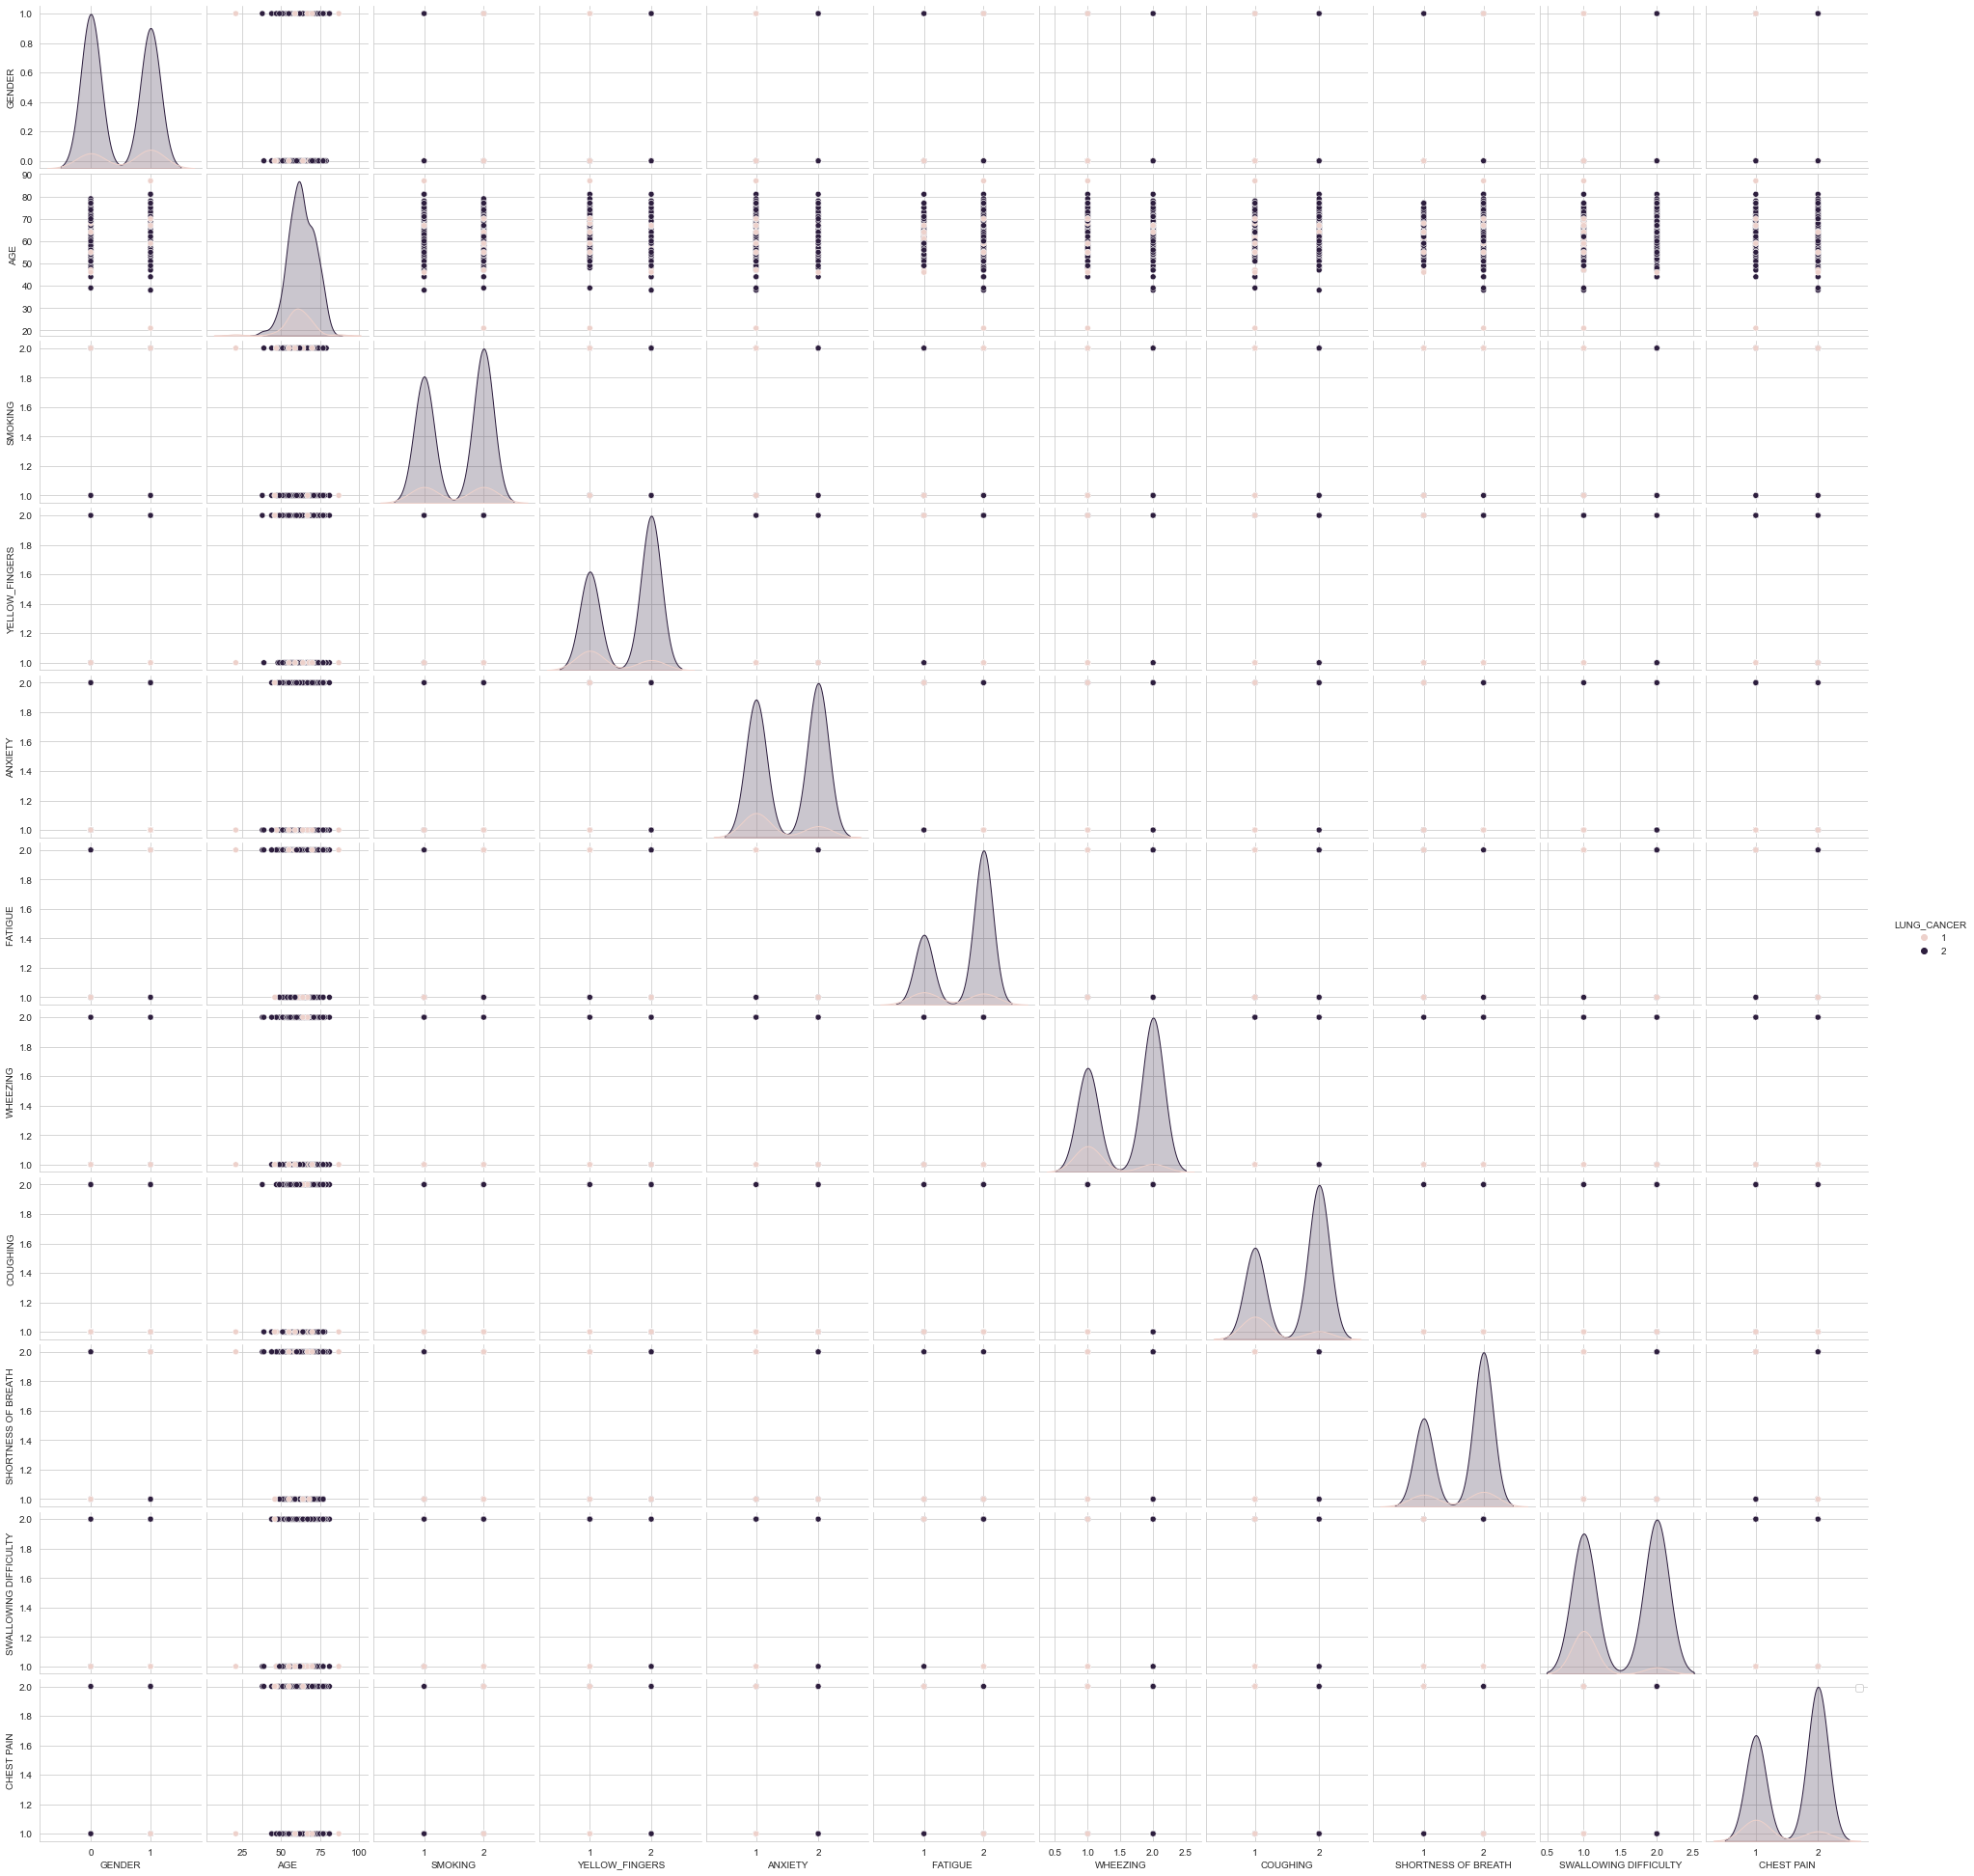

In [286]:
sns.set_style("whitegrid")
sns.pairplot(data,hue='LUNG_CANCER')
plt.legend()
plt.show()

LUNG_CANCER
2    231
1     38
dtype: int64


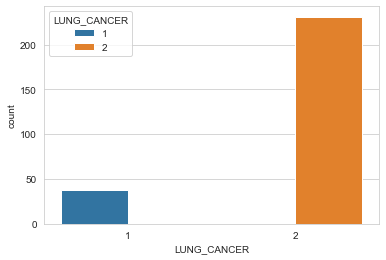

In [287]:
sns.countplot(x = 'LUNG_CANCER', hue = 'LUNG_CANCER', data = data)
print(data.value_counts("LUNG_CANCER"))

Our data appears to be substantially biassed in favour of people with a diagnosis of lung cancer. Due to being trained on unbalanced data, our machine learning model may have developed some bias, favouring estimating a lung cancer diagnosis rather than not.

<AxesSubplot:xlabel='GENDER', ylabel='count'>

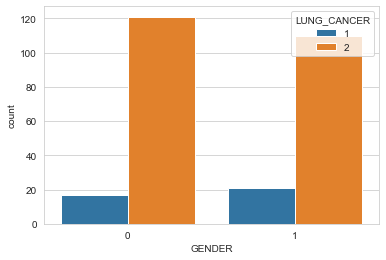

In [288]:
sns.countplot(x = 'GENDER', hue = 'LUNG_CANCER', data = data)

The distribution of data is normal

GENDER  LUNG_CANCER
0       1               17
        2              121
1       1               21
        2              110
Name: LUNG_CANCER, dtype: int64


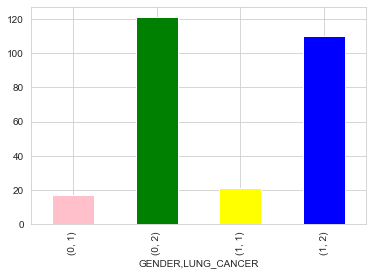

In [289]:
x = data.groupby(["GENDER","LUNG_CANCER"])["LUNG_CANCER"].count()
print(x)

x.plot(kind="bar", color=["pink", "green", "yellow", "blue"])
plt.show()

The table below presents a summary of lung cancer data, summarised by patients gender. An examination of this table, it confirms that more males have lung cancer then female.

The mean of age is about 62.8 or about 63. The standard deviation is 8.39 which means that 68% of the data lies within 8 years from the mean. The data is somewhat left-skewed because there are more extreme values away from the mean fall on the left side of the curve.




In [313]:
grouped_data = data.groupby(['GENDER','LUNG_CANCER']).size().unstack()
grouped_data

LUNG_CANCER,1,2
GENDER,,
0,17,121
1,21,110


In [314]:
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
GENDER,269.0,0.486989,0.500762,0.0,0.0,0.0,1.0,1.0
AGE,269.0,62.855019,8.393616,21.0,57.0,62.0,69.0,87.0
SMOKING,269.0,1.542751,0.499098,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,269.0,1.572491,0.495639,1.0,1.0,2.0,2.0,2.0
ANXIETY,269.0,1.498141,0.500929,1.0,1.0,1.0,2.0,2.0
FATIGUE,269.0,1.657993,0.475266,1.0,1.0,2.0,2.0,2.0
WHEEZING,269.0,1.546468,0.498764,1.0,1.0,2.0,2.0,2.0
COUGHING,269.0,1.576208,0.495079,1.0,1.0,2.0,2.0,2.0
SHORTNESS OF BREATH,269.0,1.624535,0.485145,1.0,1.0,2.0,2.0,2.0
SWALLOWING DIFFICULTY,269.0,1.468401,0.499931,1.0,1.0,1.0,2.0,2.0


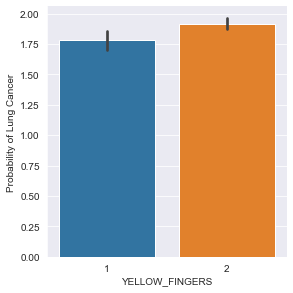

In [315]:
plc = sns.catplot(x = "YELLOW_FINGERS", y = "LUNG_CANCER", data = data, kind = "bar", height = 4)
plc.set_ylabels("Probability of Lung Cancer")
plt.show()

Yellow fingers may occur if lung cancer has progressed to the pancreas or liver. When your skin or the whites of your eyes turn yellow, you have jaundice. It results from an accumulation of bilirubin in the body.

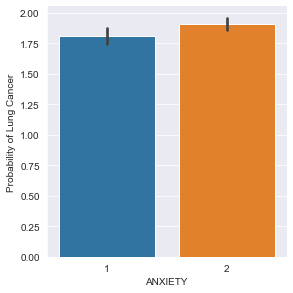

In [316]:
plc = sns.catplot(x = "ANXIETY", y = "LUNG_CANCER", data = data, kind = "bar", height = 4)
plc.set_ylabels("Probability of Lung Cancer")
plt.show()

Many other feelings, including grief, rage, and a sense of helplessness, can be brought on by a serious diagnosis like lung cancer.

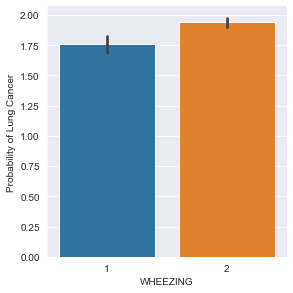

In [317]:
plc = sns.catplot(x = "WHEEZING", y = "LUNG_CANCER", data = data, kind = "bar", height = 4)
plc.set_ylabels("Probability of Lung Cancer")
plt.show()

The most common lung disease that causes wheezing is asthma, although lung cancer can also cause it.

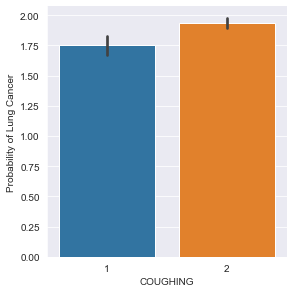

In [318]:
plc = sns.catplot(x = "COUGHING", y = "LUNG_CANCER", data = data, kind = "bar", height = 4)
plc.set_ylabels("Probability of Lung Cancer")
plt.show()

Coughing is usally the main factor of lung cancer. Lung cancer cough often starts off dry and comes in spasms. It may feel like you constantly need to clear your throat.

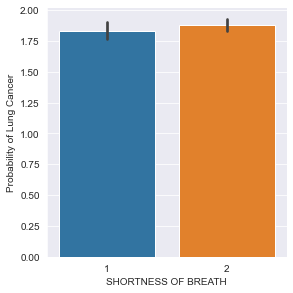

In [323]:
plc = sns.catplot(x = "SHORTNESS OF BREATH", y = "LUNG_CANCER", data = data, kind = "bar", height = 4)
plc.set_ylabels("Probability of Lung Cancer")
plt.show()

The growth of lung cancer tumours can obstruct airways, put pressure on the lungs, or inflame the respiratory system. All of these situations can make it difficult for your respiratory system to function effectively, which can cause issues with breathing in enough air.

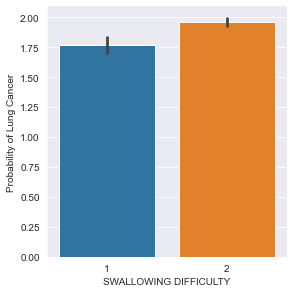

In [320]:
plc = sns.catplot(x = "SWALLOWING DIFFICULTY", y = "LUNG_CANCER", data = data, kind = "bar", height = 4)
plc.set_ylabels("Probability of Lung Cancer")
plt.show()

Many patients with lung cancer experience difficulty in swallowing. The medical term for this symptom is dysphagia and refers to any dysfunction in swallowing

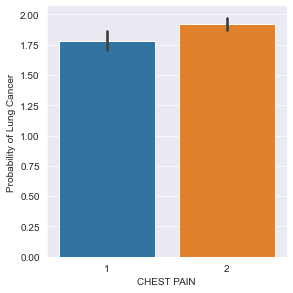

In [321]:
plc = sns.catplot(x = "CHEST PAIN", y = "LUNG_CANCER", data = data, kind = "bar", height = 4)
plc.set_ylabels("Probability of Lung Cancer")
plt.show()

When a lung tumour presses on nerves or tightens the chest, it can produce chest discomfort. This pain is often worse when you cough, laugh, or breathe deeply.

# Analyzing Lung Cancer Symptoms

Checking the amount of patients with and without these symptoms


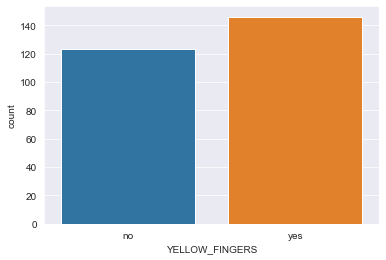

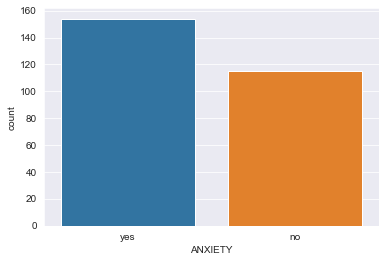

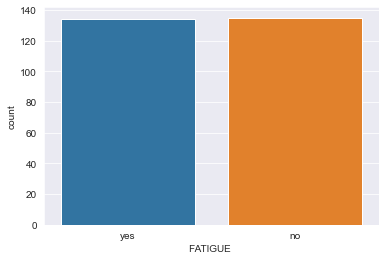

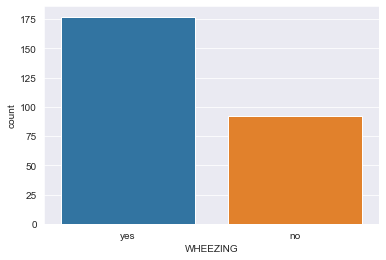

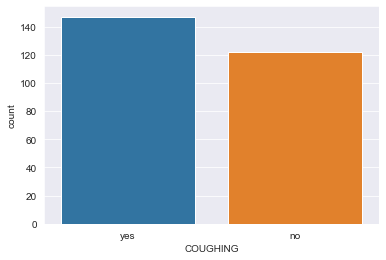

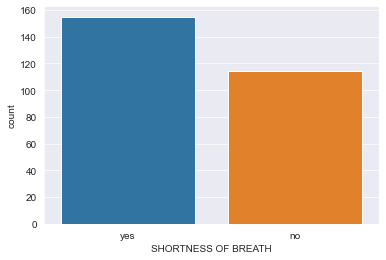

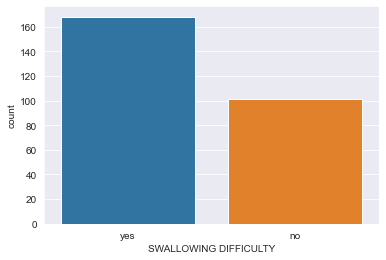

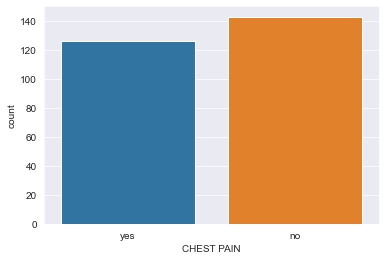

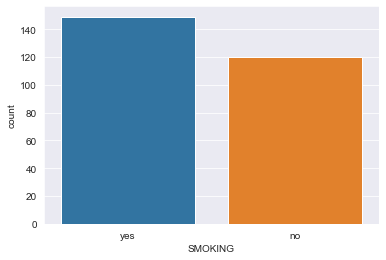

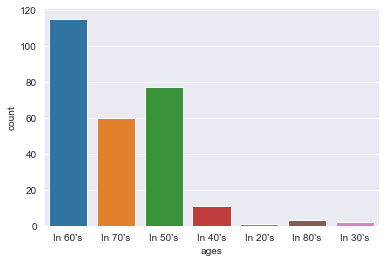

In [220]:
data1 = data.drop(['AGE', 'LUNG_CANCER', 'GENDER'], axis = 1)
data1.columns = [ 'YELLOW_FINGERS', 'ANXIETY', 'FATIGUE ', 'WHEEZING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'SMOKING', 'ages']

key = {2: 'yes', 1: 'no'}
for sys in data1.columns:
    sns.countplot(x = data1[sys].replace(key)) 
    plt.show()

LUNG_CANCER
2    231
1     38
dtype: int64


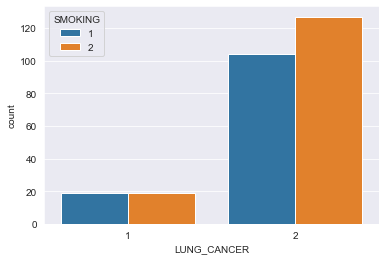

In [172]:
sns.countplot(x = 'LUNG_CANCER', hue = 'SMOKING', data = data)
print(data.value_counts("LUNG_CANCER"))

231 patients have luncer while 38 do not

In [20]:
smocan = data.groupby(["SMOKING","LUNG_CANCER"]).agg(total=("LUNG_CANCER","count")).reset_index()
smocan

,SMOKING,LUNG_CANCER,total
0,1,1,19
1,1,2,104
2,2,1,19
3,2,2,127


With this chart, we can see that majoirty of smokers have lung cancer.

# Conclusion/Discussion

Based on the data set provided above we can make a short summary. Lung cancer symptoms can change from person to person. Some people have lung-related problems, and some people have lung cancer that has spread to other parts of the body which experience symptoms unique to that area of the body. Some individuals merely experience generic signs of illness. Most lung cancer patients don't exhibit symptoms until the disease has progressed. Both men and women are equally capable to get Lung cancer and those who do get it, get it at the age of 60+. This is only if certain things happen to cause cancer such as smoking, exposure to other people's smoke, and air pollution. Lung cancer can affect people who have never smoked, but smokers are at a higher risk than nonsmokers. The amount and frequency of cigarettes smoked over time both affect a person's risk of developing lung cancer. Even after years of smoking, one can greatly lower their risk of acquiring lung cancer by quitting. When you smoke, you have a higher chance of increasing other factors such as fatigue, yellow fingers, and coughing. Without smoking, a good chunk of those symptoms will not occur. Majority of those who get lung cancer start noticing symptoms after the age of 50, with a high chance of contracting cancer at 60.

To conclude, we can state that the main factors of lung cuncer are: shortness of breath, fatigue, yellow fingers, and smoking.

# References
1. Source data - https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer
2. Pandas for data manipulation
3. Seaborn for data viz
4. Matplotlib for data viz 
5. https://www.hopkinsmedicine.org/health/conditions-and-diseases/lung-cancer/manage-shortness-of-breath-with-lung-cancer#:~:text=What%20causes%20shortness%20of%20breath,problems%20getting%20in%20enough%20air.
6. https://lungcancer.net/symptoms/difficulty-swallowing#:~:text=Many%20patients%20with%20lung%20cancer,to%20any%20dysfunction%20in%20swallowing.
7. Image- https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.medicalnewstoday.com%2Farticles%2F321749&psig=AOvVaw1sGJ8xVyA4XrKWLB0eOo06&ust=1669948294363000&source=images&cd=vfe&ved=0CBEQjhxqFwoTCOj58Kiw1_sCFQAAAAAdAAAAABAE